In [ ]:
import csv
import pandas as pd

In [ ]:
url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/42f17a3c-a4db-4965-ba68-3dffe6bca13a/download/daily_vacc_scot_20211117.csv'
data= pd.read_csv(url)
data




Date    Country  ... CumulativePercentCoverage            AgeBand
0     20201208  S92000003  ...                       NaN   All vaccinations
1     20201208  S92000003  ...                       NaN   All vaccinations
2     20201208  S92000003  ...                       NaN   All vaccinations
3     20201208  S92000003  ...                       NaN   All vaccinations
4     20201208  S92000003  ...                       NaN   All vaccinations
...        ...        ...  ...                       ...                ...
7429  20211126  S92000003  ...                 82.482744  12 years and over
7430  20211126  S92000003  ...                       NaN   All vaccinations
7431  20211126  S92000003  ...                 35.973889  18 years and over
7432  20211126  S92000003  ...                 62.394405  50 years and over
7433  20211126  S92000003  ...                 33.421939  12 years and over

[7434 rows x 10 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7434 entries, 0 to 7433
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        7434 non-null   int64  
 1   Country                     7434 non-null   object 
 2   Product                     7434 non-null   object 
 3   Population                  3186 non-null   float64
 4   Dose                        7434 non-null   object 
 5   NumberVaccinated            7434 non-null   int64  
 6   PercentCoverage             3186 non-null   float64
 7   CumulativeNumberVaccinated  7434 non-null   int64  
 8   CumulativePercentCoverage   3186 non-null   float64
 9   AgeBand                     7434 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 580.9+ KB


In [ ]:
print('This dataset was colelcted from' , data.Date.min(), ' to ' , data.Date.max())

This dataset was colelcted from 20201208  to  20211125


In [ ]:
print('Doses captured in the data are: \n', data.Dose.unique())

Doses captured in the data are: 
 ['Dose 1' 'Dose 2' 'Dose 3 and Booster']


In [ ]:
print('products captured in the data are: \n', data.Product.unique())

products captured in the data are: 
 ['AstraZeneca (Vaxzevria)' 'Moderna (Spikevax)'
 'Pfizer BioNTech (Comirnaty)' 'Total']


In [ ]:
print('Different age groupings used in the data are: \n', data.AgeBand.unique())

Different age groupings used in the data are: 
 ['All vaccinations' '18 years and over' '50 years and over'
 '12 years and over']


In [ ]:
#Creating subset for Records for agegroup All vaccinations of all products
Daily_12_over= data[(data.AgeBand == '12 years and over') ]
print(Daily_12_over)

          Date    Country  ... CumulativePercentCoverage            AgeBand
12    20201208  S92000003  ...                  0.040536  12 years and over
16    20201208  S92000003  ...                  0.000000  12 years and over
20    20201208  S92000003  ...                  0.000000  12 years and over
33    20201209  S92000003  ...                  0.121442  12 years and over
37    20201209  S92000003  ...                  0.000000  12 years and over
...        ...        ...  ...                       ...                ...
7408  20211125  S92000003  ...                 82.458974  12 years and over
7412  20211125  S92000003  ...                 32.795726  12 years and over
7425  20211126  S92000003  ...                 90.716970  12 years and over
7429  20211126  S92000003  ...                 82.482744  12 years and over
7433  20211126  S92000003  ...                 33.421939  12 years and over

[1062 rows x 10 columns]


In [ ]:
print('products captured in the data are: \n', Daily_12_over.Product.unique())

products captured in the data are: 
 ['Total']


In [ ]:

Dose1=Daily_12_over[Daily_12_over.Dose == 'Dose 1']
Dose2=Daily_12_over[Daily_12_over.Dose == 'Dose 2']
Dose3_boost=Daily_12_over[Daily_12_over.Dose == 'Dose 3 and Booster']

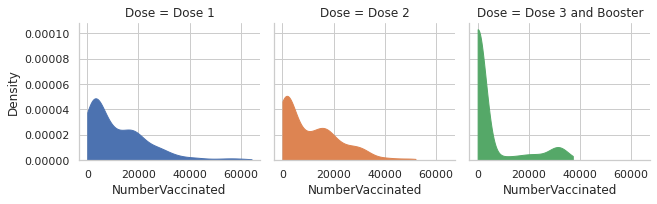

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid") #setting theme as seaborn whitegrid 

plot = sns.FacetGrid(Daily_12_over, col='Dose', hue='Dose', col_wrap=4)
plot = plot.map(sns.kdeplot,"NumberVaccinated", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

plt.show()

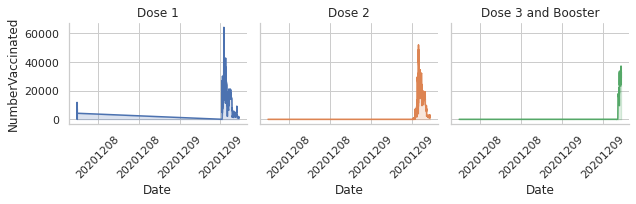

In [ ]:
# Creating and initializing a grid 
#with sns.axes_style('white'), sns.plotting_context('notebook', rc={'xtick.rotation':45}):
plot = sns.FacetGrid(Daily_12_over, col='Dose', hue='Dose' )
 
# using plot function to add line over the area   
plot.map(plt.plot, 'Date', 'NumberVaccinated')
plot.set_xticklabels(Daily_12_over.Date, rotation=45)

# using fill_between to Fill the area 
plot.map(plt.fill_between, 'Date', 'NumberVaccinated', alpha=0.2).set_titles("{col_name} Dose")
 
# Controlling the title of each facet
plot.set_titles("{col_name}")

# Show the graph
#plt.show()

In [ ]:
data2=limitime(data,'20200104','20210402')

# Creating and initializing a grid 
plot = sns.FacetGrid(data2, col='Dose', hue='Dose' )
# using plot function to add line over the area   
plot.map(plt.plot, 'Date', 'NumberVaccinated')
plot.set_xticklabels(data2.Date, rotation=45)

# using fill_between to Fill the area 
plot.map(plt.fill_between, 'Date', 'NumberVaccinated', alpha=0.2).set_titles("{col_name} Dose")

# Controlling the title of each facet
plot = plot.set_titles("{col_name}")



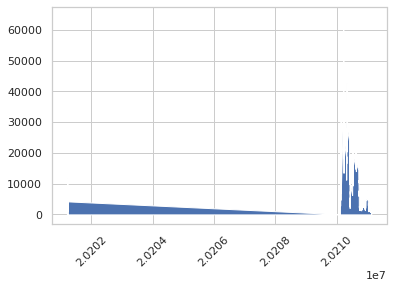

In [ ]:
# Create data
x=Dose1.Date
y=Dose1.NumberVaccinated

# Area plot
plt.fill_between(x, y)
plt.xticks(rotation=45) 
plt.show()

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format

# data['Date']=pd.to_datetime(data['Date'], format='%Y%m%d')
# data['Date']

# alt.data_transformers.disable_max_rows()
# alt.Chart(data).mark_line().encode(x='Date',y='NumberVaccinated')


Dose1['Date']=pd.to_datetime(Dose1['Date'], format='%Y%m%d')
Dose1['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose1).mark_line().encode(x='Date',y='NumberVaccinated')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


alt.Chart(...)

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format


Dose2['Date']=pd.to_datetime(Dose2['Date'], format='%Y%m%d')
Dose2['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose2).mark_line().encode(x='Date',y='NumberVaccinated')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


alt.Chart(...)

In [ ]:
#Timing and number of vaccinations
!pip install altair
import altair as alt
#change "time" format


Dose3_boost['Date']=pd.to_datetime(Dose3_boost['Date'], format='%Y%m%d')
Dose3_boost['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose3_boost).mark_line().encode(x='Date',y='NumberVaccinated')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


alt.Chart(...)

In [ ]:
brush = alt.selection(type='interval')
data_all=data[data.AgeBand != 'All vaccinations']
data_all['Date']=pd.to_datetime(data_all['Date'], format='%Y%m%d')
data_all['Date']
points = alt.Chart().mark_point().encode(
    alt.X('Date', title='Date'),
    alt.Y('NumberVaccinated', title='Number vaccinated'),
    color=alt.condition(brush, 'Dose', alt.value('lightgray'))
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

alt.vconcat(points, data=data_all)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


alt.VConcatChart(...)

In [ ]:
#Dataframe for daily total aggregation
Tdata=data[data['Product'] == 'Total']

#Dataframe for daily total Dose 1 aggregation
D1Total=Tdata[Tdata['Dose'] == 'Dose 1']
#Dataframe for daily total Dose 2 aggregation
D2Total=Tdata[Tdata['Dose'] == 'Dose 2']
#Dataframe for daily total Dose 23 aggregation
D3Total=Tdata[Tdata['Dose'] == 'Dose 3 and Booster']

#Dataframe for daily total  for age 12 years and over
D1Total_12plus=D1Total[D1Total['AgeBand'] == '12 years and over']
D2Total_12plus=D2Total[D2Total['AgeBand'] == '12 years and over']
D3Total_12plus=D3Total[D3Total['AgeBand'] == '12 years and over']

#Dataframe for daily total Dose 1 aggregation for age 18 years and over
D1Total_18plus=D1Total[D1Total['AgeBand'] == '18 years and over']
D2Total_18plus=D2Total[D2Total['AgeBand'] == '18 years and over']
D3Total_18plus=D3Total[D3Total['AgeBand'] == '18 years and over']

#Dataframe for daily total Dose 1 aggregation for age 50 years and over
D1Total_50plus=D1Total[D1Total['AgeBand'] == '50 years and over']
D2Total_50plus=D2Total[D2Total['AgeBand'] == '50 years and over']
D3Total_50plus=D3Total[D3Total['AgeBand'] == '50 years and over']

#calculating cumulative number of people vaccinated for dose 1
D1cum_12plus=D1Total_12plus.NumberVaccinated.sum()
D1cum_18plus=D1Total_18plus.NumberVaccinated.sum()
D1cum_50plus=D1Total_50plus.NumberVaccinated.sum()

#calculating cumulative number of people vaccinated for dose 2
D2cum_12plus=D2Total_12plus.NumberVaccinated.sum()
D2cum_18plus=D2Total_18plus.NumberVaccinated.sum()
D2cum_50plus=D2Total_50plus.NumberVaccinated.sum()

#calculating cumulative number of people vaccinated for dose 3
D3cum_12plus=D3Total_12plus.NumberVaccinated.sum()
D3cum_18plus=D3Total_18plus.NumberVaccinated.sum()
D3cum_50plus=D3Total_50plus.NumberVaccinated.sum()

#Number of people vaccinated grouped by age as 12-18, 18-50, 50 and over for dose 1
D1age_12to18= D1cum_12plus-D1cum_18plus
D1age_18to50= D1cum_18plus-D1cum_50plus
D1age_50andplus= D1cum_50plus

#Number of people vaccinated grouped by age as 12-18, 18-50, 50 and over for dose 2
D2age_12to18= D2cum_12plus-D2cum_18plus
D2age_18to50= D2cum_18plus-D2cum_50plus
D2age_50andplus= D2cum_50plus

#Number of people vaccinated grouped by age as 12-18, 18-50, 50 and over for dose 3
D3age_12to18= D3cum_12plus-D3cum_18plus
D3age_18to50= D3cum_18plus-D3cum_50plus
D3age_50andplus= D3cum_50plus

d = {'AgeBand': ['12 -18 years ', '18 to 50 years', '50 years and over','12 -18 years ', '18 to 50 years', '50 years and over','12 -18 years ', '18 to 50 years', '50 years and over'], 
     'Dose': ['Dose1','Dose1','Dose1','Dose2','Dose2','Dose2','Dose 3 and Booster','Dose 3 and Booster','Dose 3 and Booster'],
     'CummNumberVaccinated': [D1age_12to18, D1age_18to50, D1age_50andplus,D2age_12to18, D2age_18to50, D2age_50andplus,D3age_12to18, D3age_18to50, D3age_50andplus]}
df = pd.DataFrame(data=d)
print(df)

             AgeBand                Dose  CummNumberVaccinated
0      12 -18 years                Dose1                221296
1     18 to 50 years               Dose1               1898972
2  50 years and over               Dose1               2218241
3      12 -18 years                Dose2                 25142
4     18 to 50 years               Dose2               1741915
5  50 years and over               Dose2               2177158
6      12 -18 years   Dose 3 and Booster                  1709
7     18 to 50 years  Dose 3 and Booster                217442
8  50 years and over  Dose 3 and Booster               1349324


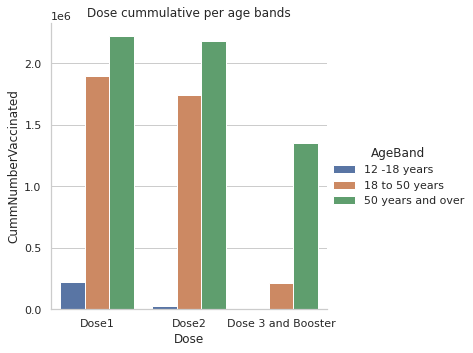

In [ ]:
sns.catplot( y="CummNumberVaccinated", x="Dose", data= df, kind='bar',hue="AgeBand").set(title='Dose cummulative per age bands')
plt.show()

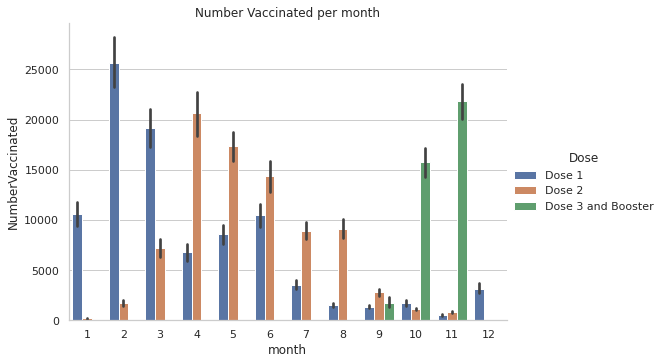

In [ ]:

data['Date']=pd.to_datetime(data['Date'], format='%Y%m%d')
data['Date']
data['month']=data['Date'].dt.month
vaccination_date=data.groupby('month')['NumberVaccinated'].sum()
plt.rcParams["figure.figsize"]=12,8 #defining size for plot frame
#plt.xticks(rotation=45)

sns.catplot( y="NumberVaccinated", x="month", data= data, kind='bar',hue="Dose",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()



In [ ]:

url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/9b99e278-b8d8-47df-8d7a-a8cf98519ac1/download/daily_vacc_age_sex_20211125.csv'
data2= pd.read_csv(url)
# data2


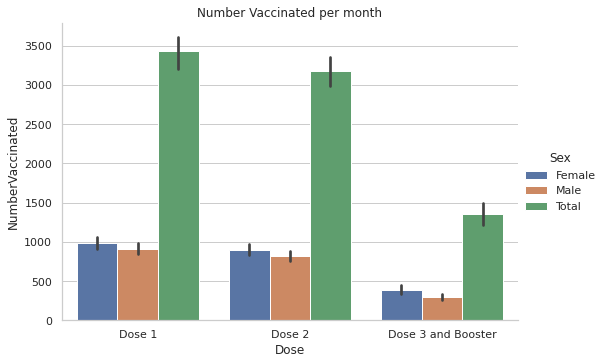

In [ ]:
data2['Date']=pd.to_datetime(data2['Date'], format='%Y%m%d')
data2['Date']
data2['month']=data['Date'].dt.month
vaccination_date=data.groupby('month')['NumberVaccinated'].sum()
plt.rcParams["figure.figsize"]=12,8 #defining size for plot frame
#plt.xticks(rotation=45)

sns.catplot( y="NumberVaccinated", x="Dose", data= data2, kind='bar',hue="Sex",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()



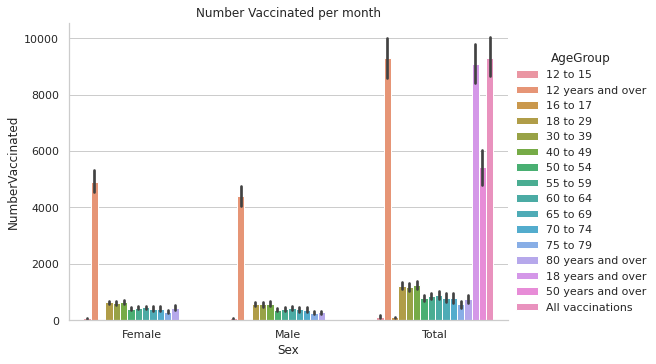

In [ ]:

p=sns.catplot( y="NumberVaccinated", x="Sex", data= data2, kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

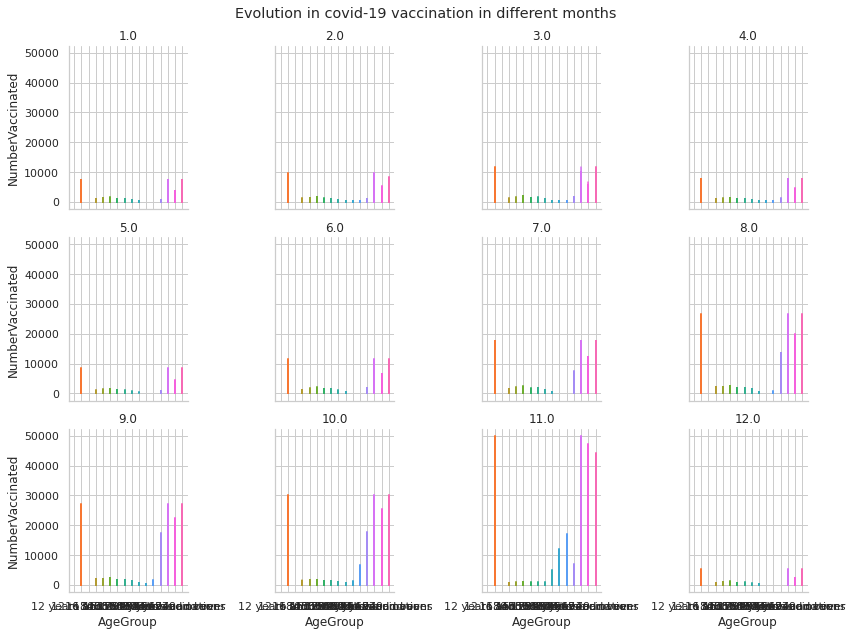

In [ ]:
 # Creating and initializing a grid 
plot = sns.FacetGrid(data2, col='month', hue='AgeGroup', col_wrap=4, )

# using plot function to add line over the area   
plot = plot.map(plt.plot, 'AgeGroup', 'NumberVaccinated')
 
# using fill_between to Fill the area 
plot = plot.map(plt.fill_between, 'AgeGroup', 'NumberVaccinated', alpha=0.2)
 
# Controlling the title of each facet
plot = plot.set_titles("{col_name}")
 
# giving a title for the whole plot
plt.subplots_adjust(top=0.92)
plot = plot.fig.suptitle('Evolution in covid-19 vaccination in different months')

# Show the graph
plt.show()

In [ ]:
# Libraries
library(tidyverse)
library(hrbrthemes)

# plot
data2 
  filter(!is.na(NumberVaccinated)) 
  arrange(NumberVaccinated) 
  tail(6) 
  mutate(Sex=factor(Sex, Sex)) 
  ggplot( aes(x=Country, y=NumberVaccinated) ) +
    geom_bar(fill="#69b3a2", stat="identity") +
    geom_text(hjust = 1, size = 3, aes( y = 0, label = paste(Sex," "))) +
    theme_ipsum() +
    theme(
      panel.grid.minor.y = element_blank(),
      panel.grid.major.y = element_blank(),
      legend.position="none",
      axis.text = element_blank()
    ) +
    xlab("") +
    ylab("") +
    coord_polar(theta = "y") +
    ylim(0,15000) 

IndentationError: ignored

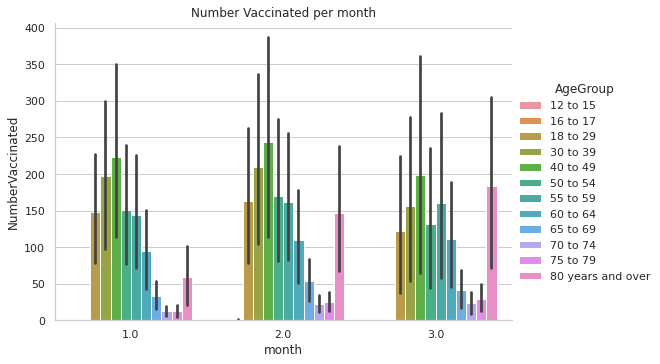

FileNotFoundError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
age_data= data2[(data2['AgeGroup'] != '12 years and over') & (data2['AgeGroup'] != '18 years and over') & (data2['AgeGroup'] != '50 years and over') & (data2['AgeGroup'] != 'All vaccinations')]
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[(age_data['month'] >= 1) & (age_data['month'] <= 3)], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()
plt.savefig('C:/Users/XX/Desktop/test.png', format='png', bbox_inches='tight', transparent=True, dpi=600) # bbox_inches='tight' 

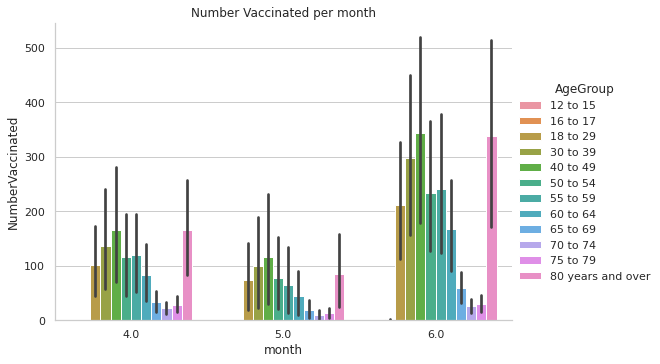

In [ ]:
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[(age_data['month'] >= 4) & (age_data['month'] <= 6)], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

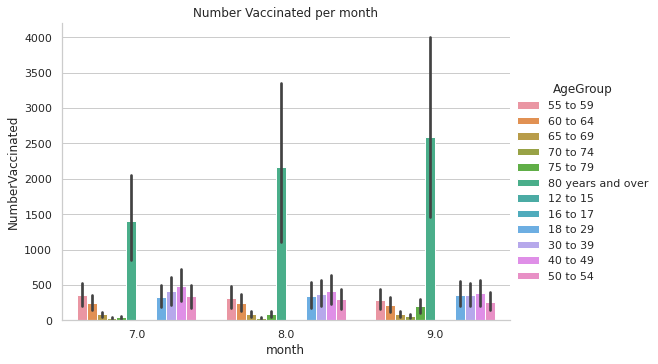

In [ ]:
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[(age_data['month'] >= 7) & (age_data['month'] <= 9)], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

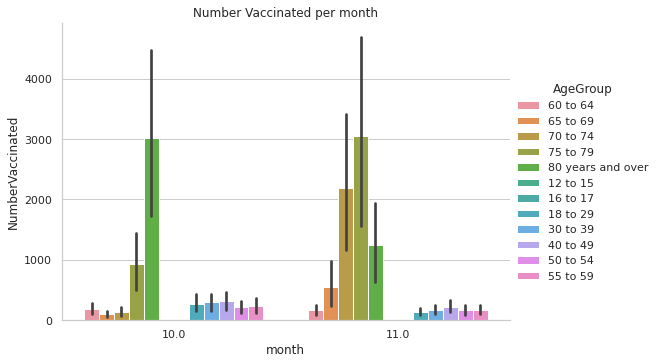

In [ ]:
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[(age_data['month'] >= 10) & (age_data['month'] <= 11)], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

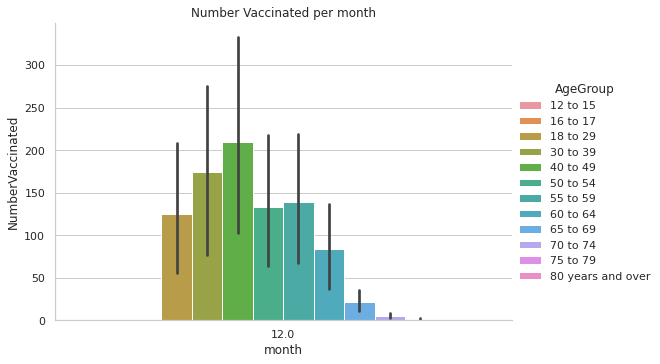

In [ ]:
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[age_data['month'] == 12], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

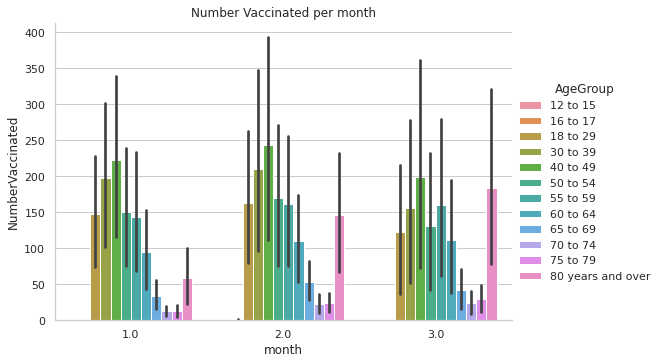

In [ ]:
age_data= data2[(data2['AgeGroup'] != '12 years and over') & (data2['AgeGroup'] != '18 years and over') & (data2['AgeGroup'] != '50 years and over') & (data2['AgeGroup'] != 'All vaccinations')]
p=sns.catplot( y="NumberVaccinated", x="month", data= age_data[(age_data['month'] >= 1) & (age_data['month'] <= 3)], kind='bar',hue="AgeGroup",aspect=60/40).set(title='Number Vaccinated per month')
plt.show()

In [ ]:
brush = alt.selection(type='interval')
data_all=data[data.AgeBand == '12 years and over']
data_all['Date']=pd.to_datetime(data_all['Date'], format='%Y%m%d')
data_all['Date']
points = alt.Chart().mark_point().encode(
    alt.X('Date', title='Date'),
    alt.Y('CumulativePercentCoverage', title='Cumulative percentage covered'),
    color=alt.condition(brush, 'Dose', alt.value('lightgray'))
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

alt.vconcat(points, data=data_all)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


alt.VConcatChart(...)

In [ ]:
#change "time" format

Dose3_boost['Date']=pd.to_datetime(Dose3_boost['Date'], format='%Y%m%d')
Dose3_boost['Date']

#choice time
def limitime(data,start,end):
    data = data[(data['Date'] >=pd.to_datetime(start)) & (data['Date'] <= pd.to_datetime(end))]
    return data

df=limitime(df,'20201208','20210402')

Dose2['Date']=pd.to_datetime(Dose2['Date'], format='%Y%m%d')
Dose2['Date']

alt.data_transformers.disable_max_rows()
alt.Chart(Dose2).mark_line().encode(x='Date',y='NumberVaccinated')


In [ ]:
!pip install altair
import csv
import pandas as pd
import altair as alt
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

#change format for large data for alt library
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:

url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/9b99e278-b8d8-47df-8d7a-a8cf98519ac1/download/daily_vacc_age_sex_20211125.csv'
data= pd.read_csv(url)
data

Date  ... CumulativePercentCoverageQF
0      20201208  ...                         NaN
1      20201208  ...                         NaN
2      20201208  ...                         NaN
3      20201208  ...                         NaN
4      20201208  ...                         NaN
...         ...  ...                         ...
44473  20211125  ...                         NaN
44474  20211125  ...                         NaN
44475  20211125  ...                           z
44476  20211125  ...                           z
44477  20211125  ...                           z

[44478 rows x 18 columns]

In [ ]:

# Delete useless values 0
df=data.drop(data[data['NumberVaccinated']==0 ].index)
# df

In [ ]:

#change "time" format

df['Date']=pd.to_datetime(df['Date'], format='%Y%m%d')
# df['Date']

In [ ]:

#select our target age group
dff=df[df.AgeGroup == '18 to 29']
# dff

# Age=data.groupby('AgeGroup')['NumberVaccinated'].sum()
# print(Age)


In [ ]:

#choice time
def limitime(data,start,end):
    data = data[(data['Date'] >=pd.to_datetime(start)) & (data['Date'] <= pd.to_datetime(end))]
    return data

data1=limitime(df,20201208,20210402)
data1

Empty DataFrame
Columns: [Date, Country, Sex, SexQF, AgeGroup, AgeGroupQF, Population, PopulationQF, Dose, DoseQF, NumberVaccinated, NumberVaccinatedQF, PercentCoverage, PercentCoverageQF, CumulativeNumberVaccinated, CumulativeNumberVaccinatedQF, CumulativePercentCoverage, CumulativePercentCoverageQF]
Index: []

TypeError: ignored

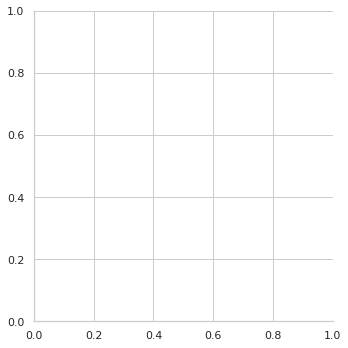

In [ ]:
sns.lmplot(x='Date',y='NumberVaccinated',hue='Dose',data=dff)



In [ ]:
!pip install altair

In [ ]:

import csv
import pandas as pd
import altair as alt
import seaborn as sns
from pandas import Series,DataFrame
import matplotlib.ticker as ticker
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib as mpl

#change format for large data for alt library
alt.data_transformers.disable_max_rows()



DataTransformerRegistry.enable('default')

In [ ]:

url='https://www.opendata.nhs.scot/dataset/6dbdd466-45e3-4348-9ee3-1eac72b5a592/resource/9b99e278-b8d8-47df-8d7a-a8cf98519ac1/download/daily_vacc_age_sex_20211125.csv'
data= pd.read_csv(url)
data

Date  ... CumulativePercentCoverageQF
0      20201208  ...                         NaN
1      20201208  ...                         NaN
2      20201208  ...                         NaN
3      20201208  ...                         NaN
4      20201208  ...                         NaN
...         ...  ...                         ...
44599  20211126  ...                         NaN
44600  20211126  ...                         NaN
44601  20211126  ...                           z
44602  20211126  ...                           z
44603  20211126  ...                           z

[44604 rows x 18 columns]

In [ ]:

# Delete useless values 0
df=data.drop(data[data['NumberVaccinated']==0 ].index)
# df

In [ ]:
#change "time" format

df['Date']=pd.to_datetime(df['Date'], format='%Y%m%d')
# df['Date']

In [ ]:
#select our target age group
dff=df[df.AgeGroup == '18 to 29']

In [ ]:

#choice time

def limitime(data,start,end):
    data = data[(data['Date'] >=pd.to_datetime(start)) & (data['Date'] <= pd.to_datetime(end))]
    return data

In [ ]:
#chose data
data0=limitime(dff,'20201105','20201215')
data1=limitime(dff,'20201208','20210104')
data2=limitime(dff,'20200104','20210402')
data3=limitime(dff,'20200402','20210526')
data4=limitime(dff,'20200611','20210702')
data5=limitime(dff,'20210702','20210920')
data6=limitime(dff,'20210920','20211001')
data7=limitime(dff,'20211001','20211004')
data8=limitime(dff,'20211004','20211025')
data9=limitime(dff,'20211025','20211125')

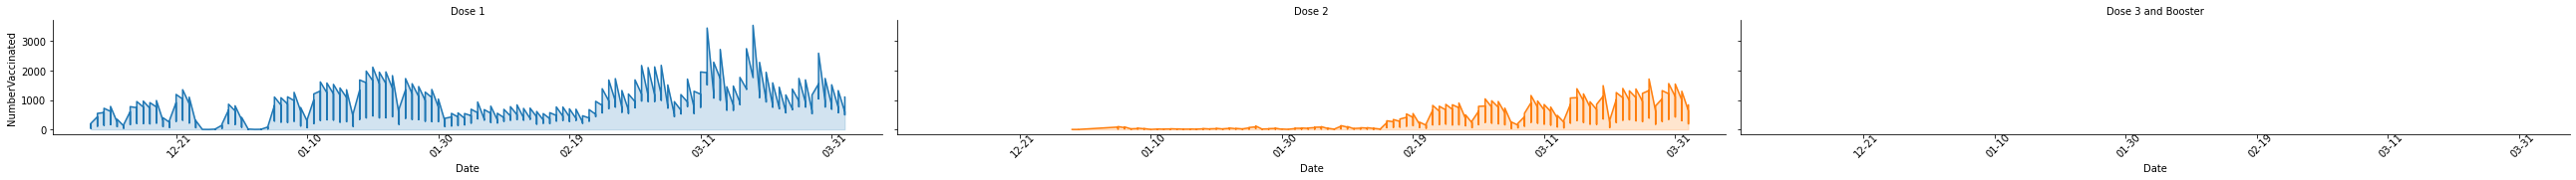

<Figure size 2160x1440 with 0 Axes>

In [ ]:

# Creating and initializing a grid 
plot = sns.FacetGrid(data2, col='Dose', hue='Dose', height=3,aspect=4 )
# using plot function to add line over the area   
plot.map(plt.plot, 'Date', 'NumberVaccinated')
plot.set_xticklabels(data2.Date, rotation=45,rotation_mode='anchor' )
# using fill_between to Fill the area 
plot.map(plt.fill_between, 'Date', 'NumberVaccinated', alpha=0.2).set_titles("{col_name} Dose")



# Controlling the title of each facet
plot = plot.set_titles("{col_name}")
ax = plt.gca()  
date_format = mpl.dates.DateFormatter("%m-%d")  
ax.xaxis.set_major_formatter(date_format) 
# plt.xticks(rotation=90) 

# control time interval
xlocator = mpl.ticker.MultipleLocator(7)
# ax.xaxis.set_major_locator(xlocator)
# fig.set_size_inches(20,20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))


# plt.gcf().autofmt_xdate() 

# Show the graph
plt.figure(figsize=(30,20)) 
plt.show()



